In [64]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

#### Load in differential gene expression analysis comparing LTBI vs. ATB subjects

In [65]:
diff_exp_df = pd.read_csv('/Users/rogervargas/OneDrive - Bill & Melinda Gates Medical Research Institute/Projects/Biomarkers/Data/GEO2R Differential Gene Expression/test/GSE19439_LTBI_v_ATB.csv')

In [66]:
diff_exp_df.head()

,Unnamed: 0,ID,Gene.title,Gene.symbol,Gene.ID,UniGene.title,UniGene.symbol,UniGene.ID,Nucleotide.Title,GI,...,GO.Function.ID,GO.Process.ID,GO.Component.ID,Platform_SEQUENCE,logFC,AveExpr,t,P.Value,adj.P.Val,B
0,ILMN_1343291,ILMN_1343291,eukaryotic translation elongation factor 1 alp...,EEF1A1,1915,NaN,NaN,NaN,Homo sapiens eukaryotic translation elongation...,83367078.0,...,GO:0005525///GO:0003924///GO:0044822///GO:0005...,GO:0071364///GO:1904714///GO:0006355///GO:0006...,GO:0030864///GO:0005737///GO:0005737///GO:0005...,TGTGTTGAGAGCTTCTCAGACTATCCACCTTTGGGTCGCTTTGCTG...,0.385736,14.440305,3.226257,0.003017,0.068049,-1.839689
1,ILMN_1343295,ILMN_1343295,glyceraldehyde-3-phosphate dehydrogenase,GAPDH,2597,NaN,NaN,NaN,Homo sapiens glyceraldehyde-3-phosphate dehydr...,576583510.0,...,GO:0051287///GO:0050661///GO:0004365///GO:0004...,GO:0061621///GO:0071346///GO:0006094///GO:0000...,GO:0097452///GO:0005737///GO:0005737///GO:0005...,CTTCAACAGCGACACCCACTCCTCCACCTTTGACGCTGGGGCTGGC...,-0.328028,9.468028,-2.496111,0.018254,0.187366,-3.457933
2,ILMN_1651199,ILMN_1651199,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,ATGCGAGGCCCCAGGGTTCGGCCCCGCAGCGCCGCTGAGTCCAAGG...,1.035946,1.066510,1.721368,0.105560,0.447180,-4.569510
3,ILMN_1651209,ILMN_1651209,solute carrier family 35 member E2,SLC35E2,9906,NaN,NaN,NaN,Homo sapiens solute carrier family 35 member E...,315139027.0,...,NaN,NaN,GO:0016021,TCACGGCGTACGCCCTCATGGGGAAAATCTCCCCGGTGACTTTCAG...,-0.600534,2.642316,-1.152984,0.258974,0.638968,-5.576959
4,ILMN_1651210,ILMN_1651210,dual specificity phosphatase 22,DUSP22,56940,NaN,NaN,NaN,Homo sapiens dual specificity phosphatase 22 (...,557440873.0,...,GO:0004725///GO:0008138,GO:0006915///GO:0008283///GO:0000188///GO:0007...,GO:0005737///GO:0005634,TGTGGACATGAGAGTTAGTTCTGTTTTGCCTGCACGGTGGGAGCGG...,0.799344,0.500913,0.537552,0.599250,0.857313,-5.684734


#### Construct volcano plot using Benjamini & Hochberg method to adjust p-values (controls False discovery rate)

In [67]:
alpha = 0.05

There are 229 significant differentially expressed genes between these two samples at a signficance threshold of 0.05


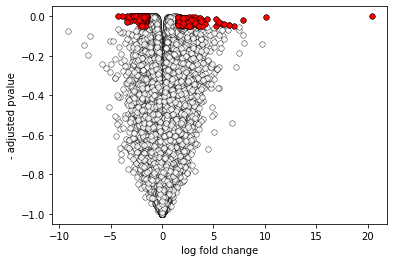

In [68]:
p_val_series = -1 * diff_exp_df.loc[: , 'adj.P.Val']
log_FC_series = diff_exp_df.loc[: , 'logFC']

fig , ax = plt.subplots()
plt.scatter(log_FC_series , p_val_series , color = 'white' , linewidth = .5 , edgecolor = 'black' , s = 30 , alpha = 0.8)

sig_diff_genes_filter = [(abs(logFC_i) > 1.5) and (pval_i > -1*alpha) for logFC_i , pval_i in zip(log_FC_series, p_val_series)]
print('There are {0} significant differentially expressed genes between these two samples at a signficance threshold of {1}'.format(np.sum(sig_diff_genes_filter) , alpha))
plt.scatter(log_FC_series[sig_diff_genes_filter] , p_val_series[sig_diff_genes_filter] , color = 'red' , linewidth = .5 , edgecolor = 'black' , s = 30)

plt.xlabel('log fold change')
plt.ylabel('- adjusted pvalue')

plt.show()

Sorted by smallest p-value

In [69]:
diff_exp_df.loc[: , ['Gene.symbol','logFC','adj.P.Val']].sort_values(by = 'adj.P.Val').head(n = 10)

,Gene.symbol,logFC,adj.P.Val
25850,DUSP3,-1.190391,0.000042
2986,CEACAM1,-1.866514,0.000042
42859,GBP5,-2.361777,0.000042
27741,VAMP5,-1.774608,0.000042
26212,ANKRD22,-3.928364,0.000042
45401,FCGR1B,-2.745593,0.000042
8209,BATF2,-3.047247,0.000042
26057,SRBD1,-1.054350,0.000042
6873,JAK2,-1.206767,0.000043
11334,SORT1,-1.175896,0.000043


Expression of *GBP5* & *DUSP3* downregulated in LTBI relative to ATB subjects?

In [70]:
diff_exp_df.loc[: , ['Gene.symbol','logFC','adj.P.Val']][diff_exp_df.loc[: , 'Gene.symbol'] == 'GBP5']

,Gene.symbol,logFC,adj.P.Val
42859,GBP5,-2.361777,0.000042


In [71]:
diff_exp_df.loc[: , ['Gene.symbol','logFC','adj.P.Val']][diff_exp_df.loc[: , 'Gene.symbol'] == 'DUSP3']

,Gene.symbol,logFC,adj.P.Val
25850,DUSP3,-1.190391,0.000042


Expression of *KLF2* upregulated in LTBI relative to ATB subjects?

In [72]:
diff_exp_df.loc[: , ['Gene.symbol','logFC','adj.P.Val']][diff_exp_df.loc[: , 'Gene.symbol'] == 'KLF2']

,Gene.symbol,logFC,adj.P.Val
16119,KLF2,0.363101,0.049137


Sorted by smallest log-FC

In [73]:
diff_exp_df.loc[: , ['Gene.symbol','logFC','adj.P.Val']].sort_values(by = 'logFC').head(n = 10)

,Gene.symbol,logFC,adj.P.Val
2464,NaN,-9.188578,0.075837
38276,NaN,-7.556929,0.144902
25292,GAPDHS,-7.186898,0.193916
34016,NaN,-6.985476,0.101781
18756,MS4A5,-5.841651,0.243751
924,PURG,-5.450382,0.261701
47124,ADAMTS14,-5.155781,0.461641
8396,VTN,-5.096586,0.125540
20074,KIRREL2,-5.067224,0.282434
4301,GABRG1,-4.941027,0.240415


Sorted by largest log-FC

In [74]:
diff_exp_df.loc[: , ['Gene.symbol','logFC','adj.P.Val']].sort_values(by = 'logFC' , ascending = False).head(n = 10)

,Gene.symbol,logFC,adj.P.Val
41171,NaN,20.439147,0.001240
28852,NaN,10.071821,0.006189
35557,NaN,9.705415,0.139733
14938,C14orf177,7.967651,0.133243
9573,NaN,7.914176,0.017658
23417,SHANK2,7.848217,0.092924
42855,KRT39,7.532014,0.185352
7137,IFNA6,7.454185,0.070050
22130,SOX11,7.447031,0.055647
36332,LINC00297,7.193028,0.255099
